In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

urban = pd.read_excel("UrbanRuralPop.xlsx")
urban.head(10)

,Table with row headers in column A and column headers in rows 4 through 6.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"Table 29. Urban and Rural Population, and by S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[In thousands, except percent (3,929 represent...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State,Post office abbreviation,Urban population,NaN,"Total, 2000 (1,000)","Urban population, 2000, current definition",NaN,"Rural population, 2000 (1,000)"
3,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Former definition (percent),Current definition (percent),NaN,"Number (1,000)",Percent,NaN
5,"United States, total",US,75.209514,78.041622,281421.906,222360.539,79.01323,59061.367
6,Alabama,AL,60.376104,56.751333,4447.1,2465.673,55.444514,1981.427
7,Alaska,AK,67.491996,60.972688,626.932,411.257,65.598342,215.675
8,Arizona,AZ,87.497231,86.476176,5130.632,4523.535,88.167208,607.097
9,Arkansas,AR,53.516298,52.04756,2673.4,1404.179,52.524089,1269.221


In [112]:
#Data Manipulation
new_col_names = ['State', 'State Abbreviation', 'Former Urban definition 1990 (percent)', 'Urban definition 1990 (percent)', 'Total Population 2000 (1,000)', 'Urban Population, 2000 (1,000)', 'Urban Population, 2000 percent', 'Rural Population, 2000 (1,000)']
urban.columns = new_col_names
urban = urban.iloc[6:57]
urban = urban.drop(urban[urban['State'] == 'District of Columbia'].index)
urban.info()
urban.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 6 to 56
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   50 non-null     object
 1   State Abbreviation                      50 non-null     object
 2   Former Urban definition 1990 (percent)  50 non-null     object
 3   Urban definition 1990 (percent)         50 non-null     object
 4   Total Population 2000 (1,000)           50 non-null     object
 5   Urban Population, 2000 (1,000)          50 non-null     object
 6   Urban Population, 2000 percent          50 non-null     object
 7   Rural Population, 2000 (1,000)          50 non-null     object
dtypes: object(8)
memory usage: 3.5+ KB


,State,State Abbreviation,Former Urban definition 1990 (percent),Urban definition 1990 (percent),"Total Population 2000 (1,000)","Urban Population, 2000 (1,000)","Urban Population, 2000 percent","Rural Population, 2000 (1,000)"
6,Alabama,AL,60.376104,56.751333,4447.1,2465.673,55.444514,1981.427
7,Alaska,AK,67.491996,60.972688,626.932,411.257,65.598342,215.675
8,Arizona,AZ,87.497231,86.476176,5130.632,4523.535,88.167208,607.097
9,Arkansas,AR,53.516298,52.04756,2673.4,1404.179,52.524089,1269.221
10,California,CA,92.645503,93.708334,33871.648,31989.663,94.443775,1881.985
11,Colorado,CO,82.428422,83.769337,4301.261,3633.185,84.467904,668.076
12,Connecticut,CT,79.143784,86.973779,3405.565,2988.059,87.740478,417.506
13,Delaware,DE,73.029776,79.216204,783.6,627.758,80.112047,155.842
15,Florida,FL,84.768826,88.010157,15982.378,14270.02,89.285962,1712.358
16,Georgia,GA,63.247953,68.749298,8186.453,5864.163,71.632525,2322.29


Text(0, 0.5, 'Population in Thousands')

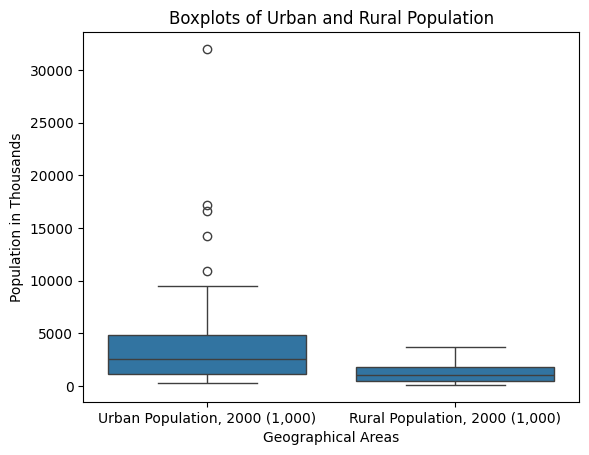

In [113]:
#Boxplot
urban_melted = urban[['Urban Population, 2000 (1,000)', 'Rural Population, 2000 (1,000)']].melt(var_name='Geographical Areas', value_name='Population (1,000)')

# Plot the boxplots using Seaborn
sns.boxplot(x='Geographical Areas', y='Population (1,000)', data=urban_melted)
plt.title('Boxplots of Urban and Rural Population')
plt.xlabel('Geographical Areas')
plt.ylabel('Population in Thousands')

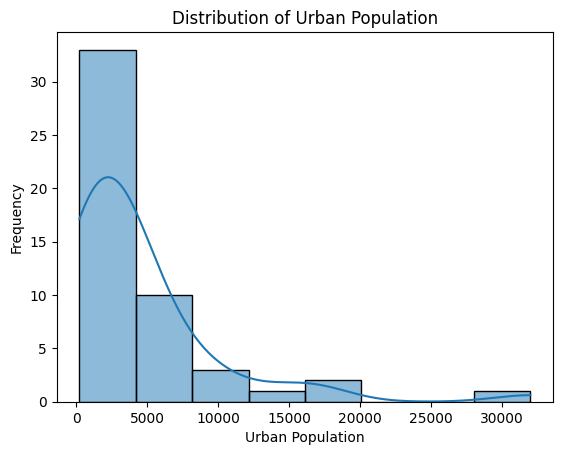

In [114]:
#Histogram
sns.histplot(urban['Urban Population, 2000 (1,000)'], bins=8, kde=True)
plt.title('Distribution of Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Frequency')
plt.show()

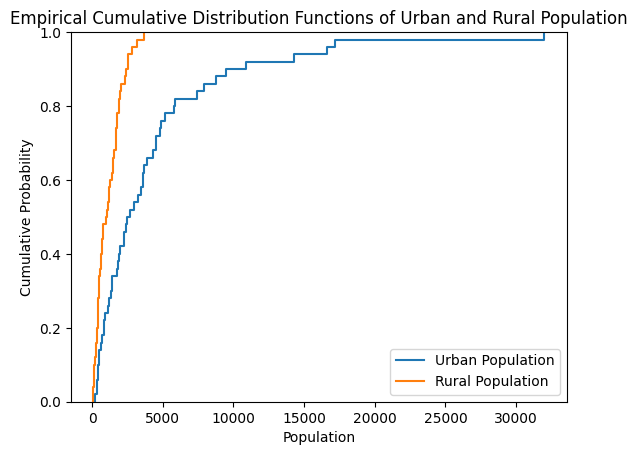

In [115]:
#eCDF Plot
sns.ecdfplot(urban['Urban Population, 2000 (1,000)'])
sns.ecdfplot(urban['Rural Population, 2000 (1,000)'])
plt.title('Empirical Cumulative Distribution Functions of Urban and Rural Population')
plt.xlabel('Population')
plt.ylabel('Cumulative Probability')
plt.legend(['Urban Population', 'Rural Population'])
plt.show()

In [116]:
land = pd.read_excel("LandArea.xlsx")
land = land[['Table with row headers in column A and column headers in rows 4 to 7.', 'Unnamed: 5']]
land.columns = ['State', 'Land Area (square miles)']
land = land.iloc[8:59]
land['State'] = land['State'].str.lstrip()
land['State'] = land['State'].str.rstrip()
land = land.drop(land[land['State'] == 'District of Columbia'].index)

# Merging on 'State' column (inner join by default)
land_urban = land.merge(urban, on='State')
land_urban.info()
land_urban

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   50 non-null     object
 1   Land Area (square miles)                50 non-null     object
 2   State Abbreviation                      50 non-null     object
 3   Former Urban definition 1990 (percent)  50 non-null     object
 4   Urban definition 1990 (percent)         50 non-null     object
 5   Total Population 2000 (1,000)           50 non-null     object
 6   Urban Population, 2000 (1,000)          50 non-null     object
 7   Urban Population, 2000 percent          50 non-null     object
 8   Rural Population, 2000 (1,000)          50 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


,State,Land Area (square miles),State Abbreviation,Former Urban definition 1990 (percent),Urban definition 1990 (percent),"Total Population 2000 (1,000)","Urban Population, 2000 (1,000)","Urban Population, 2000 percent","Rural Population, 2000 (1,000)"
0,Alabama,50644,AL,60.376104,56.751333,4447.1,2465.673,55.444514,1981.427
1,Alaska,570665,AK,67.491996,60.972688,626.932,411.257,65.598342,215.675
2,Arizona,113595,AZ,87.497231,86.476176,5130.632,4523.535,88.167208,607.097
3,Arkansas,52030,AR,53.516298,52.04756,2673.4,1404.179,52.524089,1269.221
4,California,155766,CA,92.645503,93.708334,33871.648,31989.663,94.443775,1881.985
5,Colorado,103641,CO,82.428422,83.769337,4301.261,3633.185,84.467904,668.076
6,Connecticut,4840,CT,79.143784,86.973779,3405.565,2988.059,87.740478,417.506
7,Delaware,1949,DE,73.029776,79.216204,783.6,627.758,80.112047,155.842
8,Florida,53603,FL,84.768826,88.010157,15982.378,14270.02,89.285962,1712.358
9,Georgia,57501,GA,63.247953,68.749298,8186.453,5864.163,71.632525,2322.29


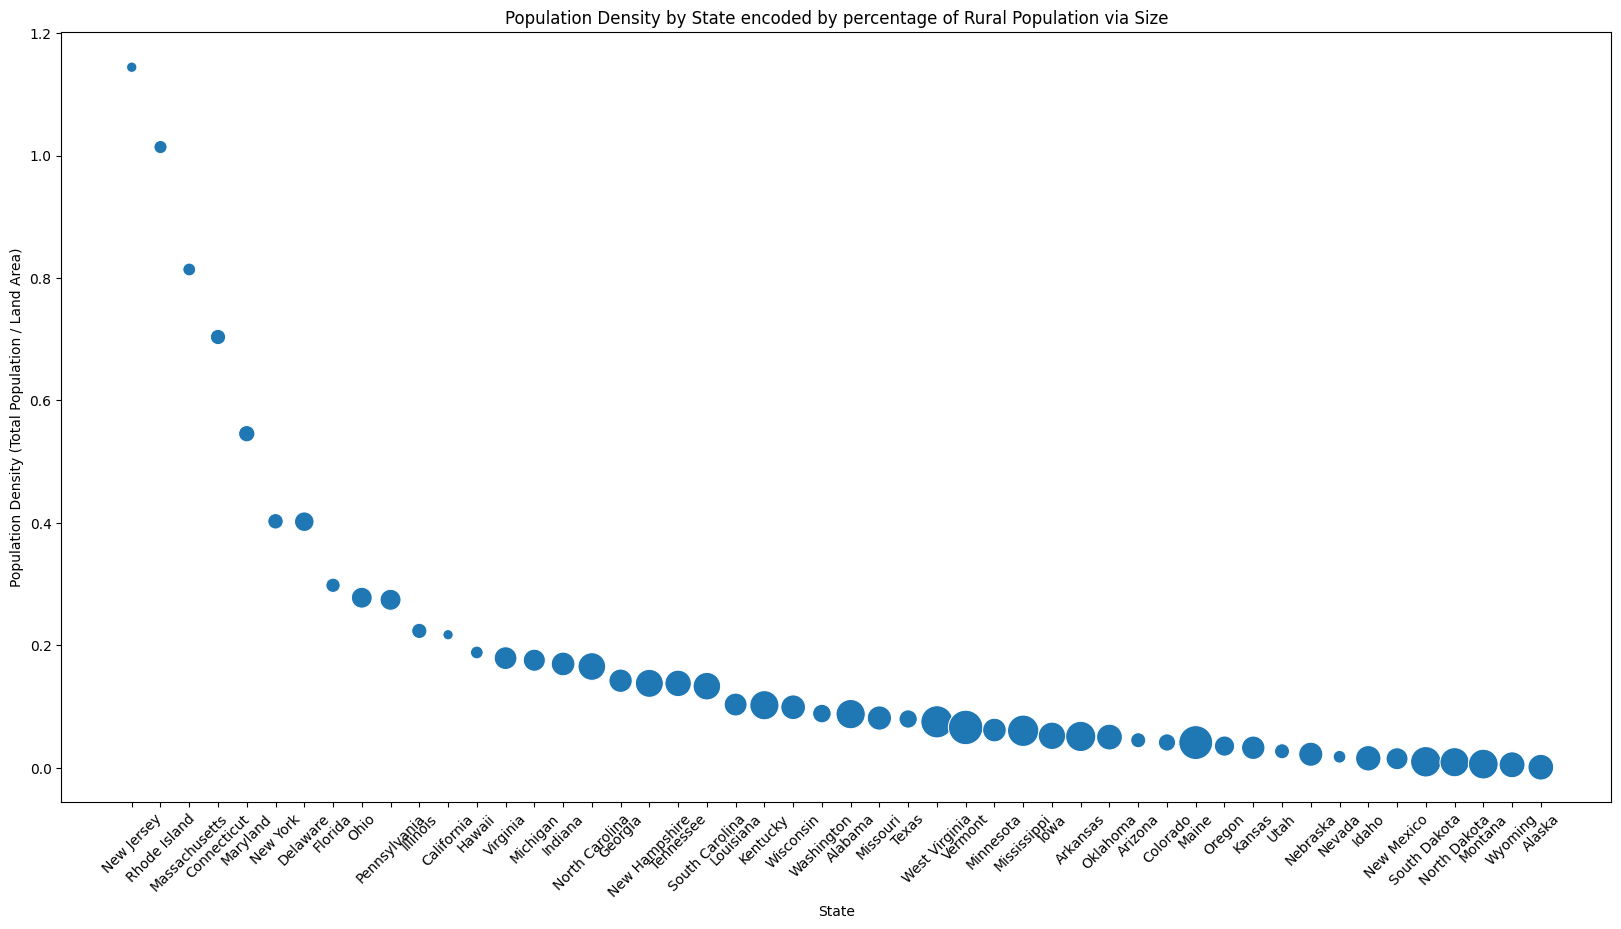

In [117]:
# Calculate Population Density (Population per square mile)
land_urban['Population Density'] = land_urban['Total Population 2000 (1,000)'] / land_urban['Land Area (square miles)']

# Sort states by population density
land_urban = land_urban.sort_values(by='Population Density', ascending=False)

# Ensure the 'Rural Population, 2000 (1,000)' column is numeric
land_urban['Rural Population, 2000 (1,000)'] = pd.to_numeric(land_urban['Rural Population, 2000 (1,000)'], errors='coerce')
land_urban['Total Population 2000 (1,000)'] = pd.to_numeric(land_urban['Total Population 2000 (1,000)'], errors='coerce')

# Handle any zero values in 'Total Population 2000 (1,000)' to avoid division by zero
land_urban['Total Population 2000 (1,000)'] = land_urban['Total Population 2000 (1,000)'].replace(0, 1)  # Replace zeros with 1 for safety

# Calculate the bubble size based on the ratio of Rural Population to Total Population
sizes = (land_urban['Rural Population, 2000 (1,000)'] / land_urban['Total Population 2000 (1,000)']) * 1000  # Scale to make the bubbles reasonable

# Create Bar Plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x=land_urban['State'], y=land_urban['Population Density'], s=sizes)

# Labels and Title
plt.xlabel("State")
plt.ylabel("Population Density (Total Population / Land Area)")
plt.title("Population Density by State encoded by percentage of Rural Population via Size")
plt.xticks(rotation=45)  # Rotate state names for better readability

plt.show()